Dataset: https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.BRCA.sampleMap%2FHiSeqV2.gz

## Data wrangling

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline

In [11]:
filename = 'TCGA.BRCA.sampleMap_HiSeqV2' 
data = pd.read_csv(filename, sep="\t")

In [13]:
data = data.set_index('sample')

In [12]:
data.head() 

,sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
0,ARHGEF10L,9.5074,7.4346,9.3216,9.0198,9.6417,9.7665,10.0931,9.1524,9.9398,...,9.6265,10.1826,9.9199,9.9090,10.0334,11.5144,10.5745,9.4048,10.9468,10.3164
1,HIF3A,1.5787,3.6607,2.7224,1.3414,0.5819,0.2738,3.6090,0.4738,2.9378,...,8.1546,2.2159,3.8645,8.1872,0.8836,1.3169,4.0696,7.2537,0.9310,2.4191
2,RNF17,0.0000,0.6245,0.5526,0.0000,0.0000,0.8765,0.0000,0.0000,0.0000,...,0.0000,0.0000,3.7305,0.0000,0.0000,1.1329,0.4258,0.0000,0.0000,0.0000
3,RNF10,11.3676,11.9181,11.9665,13.1881,12.0036,11.8118,11.3820,11.5004,12.2055,...,11.9869,12.2653,12.4815,11.8263,12.0135,11.5818,11.8663,11.5460,12.2616,12.1570
4,RNF11,11.1292,13.5273,11.4105,11.0911,11.2545,10.8554,10.7663,10.4358,11.2210,...,11.9344,11.4117,10.4902,11.5754,10.8370,10.2736,10.7644,11.8774,10.7842,11.2420


### Drop rows with zero values

In [14]:
df_replace = data.replace(0.0000, np.nan)
df_dropped = df_replace.dropna(axis=0, how='any')
df_dropped.shape

(12657, 1218)

### Split data into two dataframes:
# TODO need to change to reflect actual data

In [15]:
df1 = df_dropped.filter(regex = 'sample|11$', axis =1)
# Creating new dataframe with only columns containing expression values for normal cells

In [16]:
df1.shape

(12657, 114)

In [17]:
df1.head()

,TCGA-A7-A0CH-11,TCGA-E9-A1RC-11,TCGA-A7-A0DB-11,TCGA-BH-A0H9-11,TCGA-BH-A0E0-11,TCGA-BH-A0HA-11,TCGA-BH-A18P-11,TCGA-E9-A1N4-11,TCGA-BH-A18U-11,TCGA-E2-A1LS-11,...,TCGA-BH-A0DT-11,TCGA-BH-A0DD-11,TCGA-BH-A0B2-11,TCGA-BH-A18K-11,TCGA-E2-A1IG-11,TCGA-BH-A0B5-11,TCGA-E9-A1NF-11,TCGA-A7-A13E-11,TCGA-AC-A2FB-11,TCGA-BH-A1EV-11
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,10.0819,9.5920,9.9530,9.4255,9.5039,10.6813,9.4890,10.4934,10.1442,9.1657,...,9.8437,9.8269,10.1560,9.9853,10.0335,9.3597,10.4037,9.6265,9.9090,9.4048
RNF10,11.9788,12.0187,11.8456,11.9455,11.7797,11.5149,11.7608,11.6013,11.6033,11.9784,...,11.7101,11.9506,11.7253,11.7267,11.8407,12.1359,11.8686,11.9869,11.8263,11.5460
RNF11,11.5315,12.2147,11.5743,12.1199,10.9773,11.1492,12.0529,11.1338,11.5355,12.2425,...,11.5680,11.9201,11.4971,11.5110,11.7084,12.3855,11.8553,11.9344,11.5754,11.8774
RNF13,10.5527,11.0042,11.0165,10.5990,10.2501,10.8266,10.9653,11.0282,10.8097,10.9901,...,10.8299,10.6770,10.2482,10.6006,10.6719,10.8269,11.2244,10.9178,11.0725,11.1226
GTF2IP1,12.3518,12.4805,12.3628,12.2354,12.5141,12.7275,12.2369,12.5722,12.2129,12.3422,...,12.5003,12.7311,12.4451,12.5103,11.9762,12.6041,12.3790,12.7623,12.6265,12.7776


In [18]:
df2 = df_dropped.filter(regex = 'sample|01|05$', axis = 1)
# Creating new dataframe with only columns containing expression values for cancer cells

In [19]:
df2.shape

(12657, 1097)

# Exploratory data analysis

#### KDE plots of processed data separated by sample type (cancer/normal)

<Axes: ylabel='Density'>

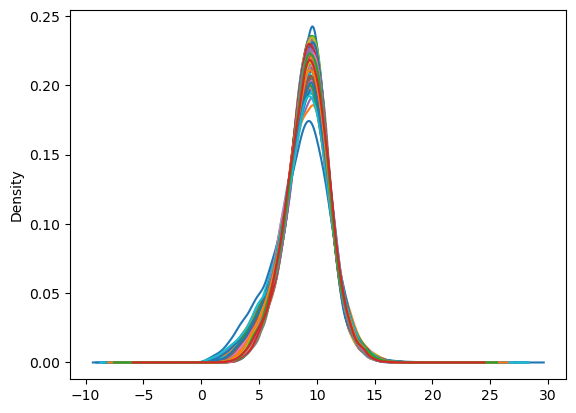

In [20]:
df1.plot(kind='kde', legend=False) # normal cells

<Axes: ylabel='Density'>

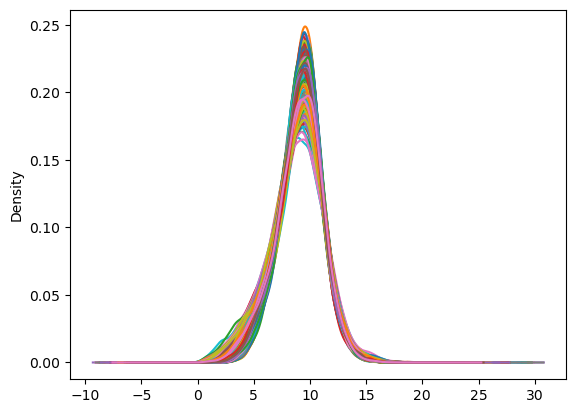

In [21]:
df2.plot(kind='kde', legend=False) # cancer cells